# Import the library

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

# Import the Datasets(Stored on my Local System)

In [32]:
data = pd.read_csv('student_scores.csv')

In [33]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [34]:
data_original = data.copy()

In [35]:
data.shape

(25, 2)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [37]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


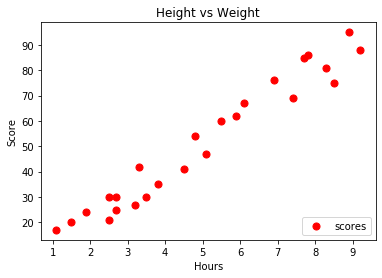

In [38]:

X = data['Hours'].values
y = data['Scores'].values
plt.scatter(X,y,label='scores',color='red',s=50)
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Height vs Weight')
plt.legend(loc="lower right")
plt.show()

In [39]:
X = data.drop('Scores',axis = 1)
X.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [40]:
y = data_original['Scores']

In [41]:
y.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y,test_size= 0.2)

In [44]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_validation)

In [45]:
print("The intercepting point of given model :",lr_model.intercept_)
print("The coeficient of the given moel :",lr_model.coef_)
print("Prediction the score from the testing datasets :", lr_pred)

The intercepting point of given model : 2.7890846023755174
The coeficient of the given moel : [9.55083559]
Prediction the score from the testing datasets : [34.30684204 87.79152132 61.04918168 48.63309542 26.66617357]


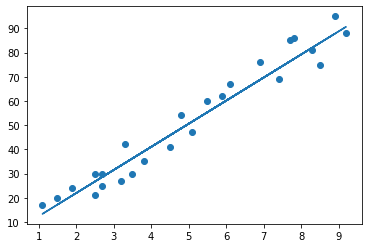

In [46]:
# Plotting the regression line
reg_line = lr_model.coef_*X+lr_model.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, reg_line)
plt.show()

In [19]:
# Comparing Actual Scores vs Predicted Scores
actual_scores = y_validation.values
predicted_score = lr_pred
list_of_tuples = list(zip(actual_scores, predicted_score)) 
comp_df = pd.DataFrame(list_of_tuples, columns = ['Actual_Scores', 'Predicted_Scores'])  

In [20]:
comp_df.head()

,Actual_Scores,Predicted_Scores
0,54,50.092259
1,27,34.824672
2,21,28.145103
3,41,47.229586
4,62,60.588724


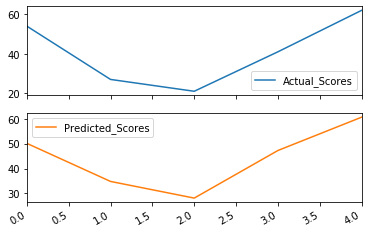

In [21]:
axes = comp_df.plot.line(subplots=True)

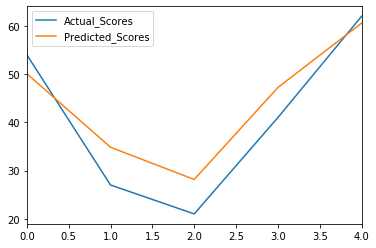

In [22]:
comp_lines = comp_df.plot.line()

In [23]:
from sklearn import metrics  
print('Mean Absolute Error for the given datasets:', 
      metrics.mean_absolute_error(y_validation, lr_pred)) 

Mean Absolute Error for the given datasets: 5.303675638995704


# Evaluation of the model

In [47]:
#Now predict the score when study hours is 9.25 per day
study_hour = 9.25
pred_score = lr_model.coef_*(study_hour)+lr_model.intercept_
print("No of Study hours ", study_hour)
print("Predicted Score for the given study hour :", pred_score)

No of Study hours  9.25
Predicted Score for the given study hour : [91.13431378]
